***Задача для соискателей***

*Вы – оператор пуска ракет на ядерном подводном ракетоносце. В результате ядерного удара противника вы потеряли возможность воспользоваться большей частью боезапаса и системой автоматического наведения. Всё, что у вас теперь есть – файл с координатами целей, одна боеспособная ракета, и компилятор C на единственном уцелевшем ноутбуке. Вам нужно вычислить оптимальные координаты точки, куда следует произвести запуск, чтобы причинить максимальный ущерб противнику. Вам известна характеристика боевой части вашей ракеты - радиус поражения.*

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

Сгенерируем координаты целей и зададим радиус поражения

In [2]:
with open('coordinates.txt', 'w') as file:
    for n in range(50):
        file.write(str(random.randrange(0,99,1))+','+str(random.randrange(0,99,1))+'\n')

In [3]:
radius = 10

Обработаем и визуализируем получившиеся координаты

In [4]:
with open('coordinates.txt') as file:
    coo=[]
    for row in file:
        coo_pairs = row.strip().split(',')
        coo.append(list(map(int, coo_pairs)))

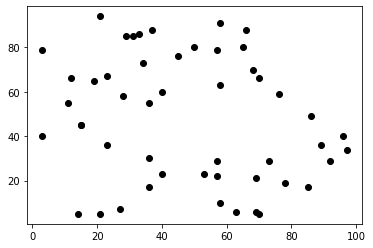

In [5]:
coo = np.array(coo)

plt.plot(coo[:, 0], coo[:, 1], 'o', color='black')
plt.plot()
plt.show()

Запустим сканирование плоскости: в каждой точке зоны будем проверять, сколько целей войдет в радиус поражения, если нанести удар в ней

In [6]:
dict_ = {}
for i in range(100):
    for j in range(100):
        n=0
        for x,y in coo:
            if (x-i)**2 + (y-j)**2 < radius**2:
                n = n+1
            else:
                n = n+0
            dict_[i,j] = n

Выберем точки с максимальным количеством целей вокруг

In [7]:
special = []
for k,v in dict_.items():
    if v==max(dict_.values()):
        special.append(k)
        points = v

Визуализируем

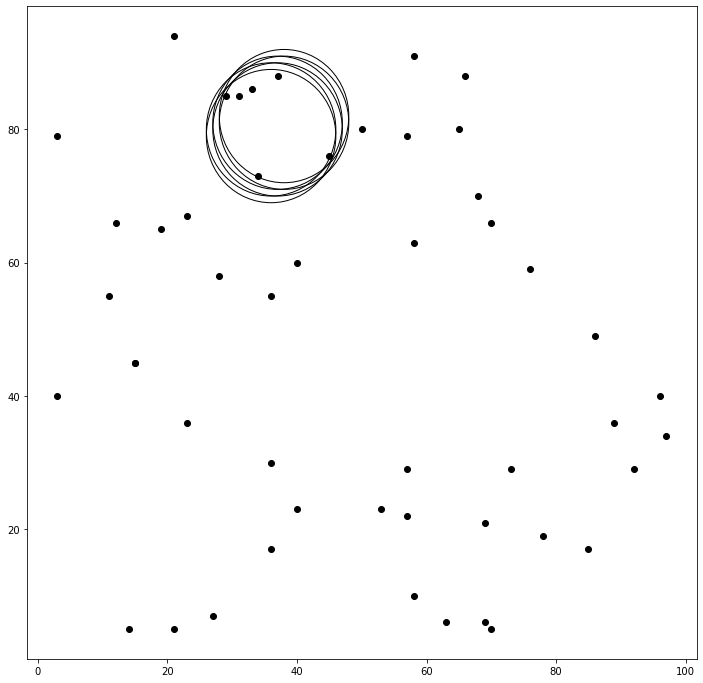

In [8]:
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot()
ax.plot(coo[:, 0], coo[:, 1], 'o', color='black')
for i,j in special:
    circle1 = Circle((i, j), 10, fill=0)
    ax.add_patch(circle1)
plt.show()

Поскольку точек с равным количеством целей в радиусе вокруг скорее всего будет несколько, нужно каким-то образом выбрать одну :

1) раз пораженных целей будет поровну, то просто возьмем первую же точку

In [9]:
target = special[0]

2) поищем точку, в которой цели находятся ближе к центру, для этого прогоним через цикл каждую точку: будем увеличивать радиус от крошечного до фактического, точка, у которой счетчик целей первым достигнет выясненного раннее общего для всех этих точек значения(при заданном радиусе поражения), та точка и будет в приоритете, ведь цели будут дальше от края

In [10]:
for r in np.arange(0, radius, 0.005):
    for i,j in special:
        n=0
        for x,y in coo:
            if (x-i)**2 + (y-j)**2 < (r)**2:
                n = n+1
            else:
                n = n+0
            if n == points:
                break
                target = [i,j]
target

(36, 79)

***!   Похоже, что это не работает, проверить***

**Рисунок для проверки**

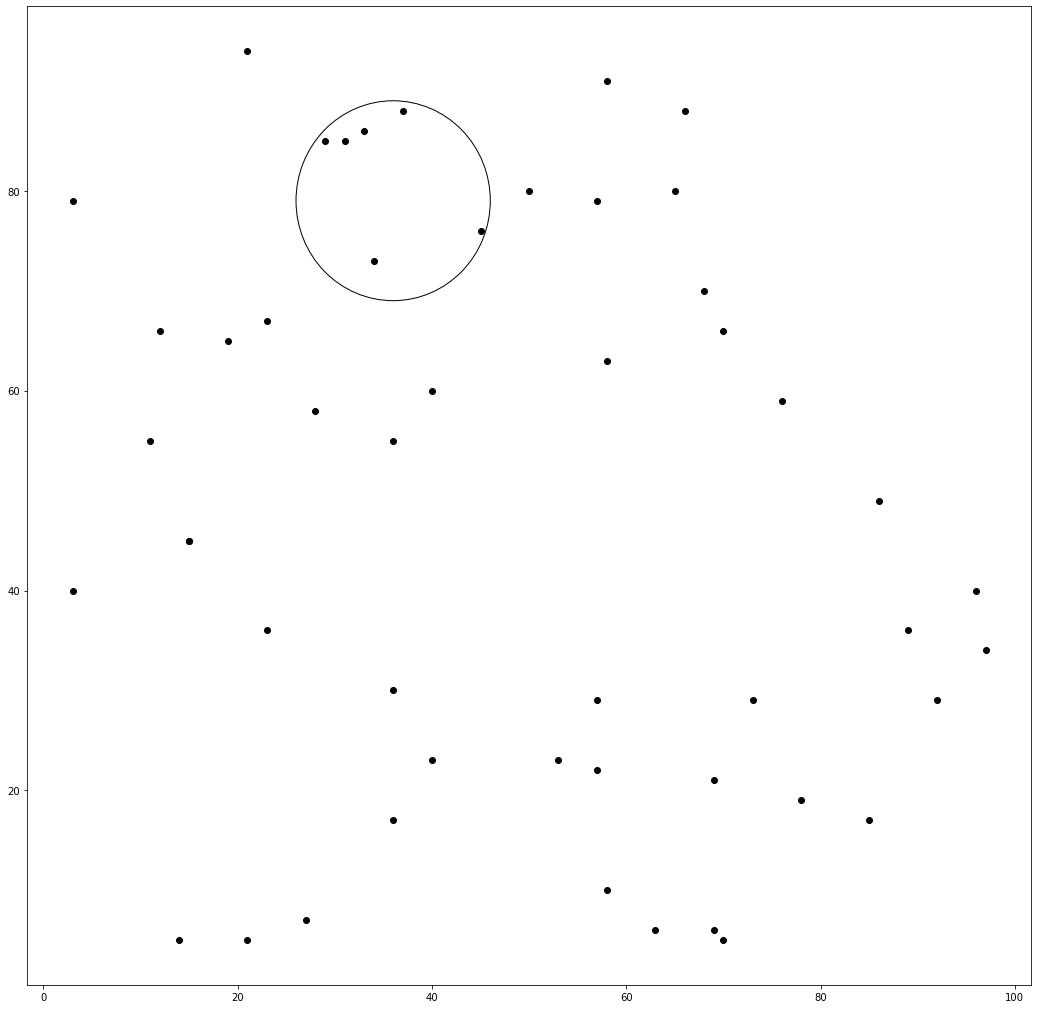

In [11]:
fig = plt.figure(figsize=[18,18])
ax = fig.add_subplot(111)
ax.plot(coo[:, 0], coo[:, 1], 'o', color='black')
circle1 = Circle(target, 10, fill=0)
ax.add_patch(circle1)
plt.show()

3) рассчитать, где ближе центр масс к точке для каждой группы целей (?) / просчитать расстояния по k-means

***!   Попробовать***

**Временный код** 
без осознанного выбора точки из спешла

Вводить: coordinates.txt, 10

In [12]:
coordinates = str(input('file with coordinates:'))
radius = int(input('radius:'))

with open(coordinates) as file:
    coo=[]
    for row in file:
        coo_pairs = row.strip().split(',')
        coo.append(list(map(int, coo_pairs)))

dict_ = {}
for i in range(100):
    for j in range(100):
        n=0
        for x,y in coo:
            if (x-i)**2 + (y-j)**2 < radius**2:
                n = n+1
            else:
                n = n+0
            dict_[i,j] = n

special = []
for k,v in dict_.items():
    if v==max(dict_.values()):
        special.append(k)
        
target = special[0]
print('target coordinates:', target)

file with coordinates:coordinates.txt
radius:10
target coordinates: (36, 79)
